<a href="https://colab.research.google.com/github/david4500/Topicos-avancados/blob/master/Copy_of_TDS_TA_05_04_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

Seja bem vindo a primeira aula de Ciência de Dados

In [0]:
print("David Menegasso Ribeiro")


David Menegasso Ribeiro


In [0]:
print("Aula do dia 05-05-2020")

Aula do dia 05-05-2020


Vamos utilizar os dados vindos do site MovieLens

In [0]:
nome_do_filme = "A volta dos que não foram"

In [0]:
print(nome_do_filme)

A volta dos que não foram


**Lendo os dados do MovieLens**

Importar dados provenientes dosite MovieLens


In [0]:
import pandas as pd



In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/david4500/Topicos-avancados/master/ml-latest-small/movies.csv")

#Ver o tipo de dado
type(filmes)



pandas.core.frame.DataFrame

In [0]:
# alterar o nome das colunas
filmes.columns = ["FilmeId","Titulo", "Genero"]
filmes.head()


,FilmeId,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes.tail()

,FilmeId,Titulo,Genero
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [0]:
?filmes.head

In [0]:
?filmes

**Lendo informaçoes das avaliacoes**

In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/david4500/Topicos-avancados/master/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# dados das avaliacoes estao organizados em 100836 linhas e 4 colunas
avaliacoes.shape

(100836, 4)

In [0]:
len(avaliacoes)

100836

Vamos alterar os titulos das colunas das avaliacoes

In [0]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")
avaliacoes_do_filme_1.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Mostrar apenas as medias das notas

In [0]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
avaliacoes_do_filme_1["nota"].head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

In [0]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [0]:
avaliacoes["nota"].mean()

3.501556983616962

Mostrar a media de avaliacao de cada filme

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes.join(notas_medias_por_filme,on="FilmeId")

,FilmeId,Titulo,Genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme,on="FilmeId")
filmes_com_media.head()

,FilmeId,Titulo,Genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values("nota" ,  ascending=False).head(15)

,FilmeId,Titulo,Genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


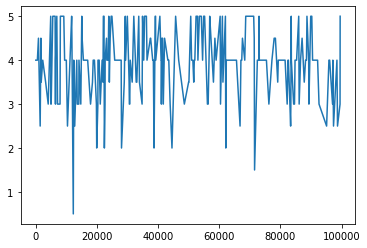

In [0]:
avaliacoes_do_filme_1["nota"].plot()

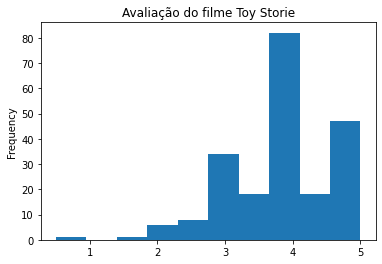

In [0]:
avaliacoes_do_filme_1["nota"].plot(kind='hist', title="Avaliação do filme Toy Storie")

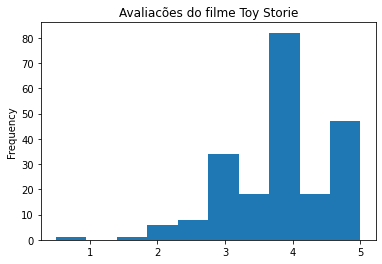

In [0]:
import matplotlib.pyplot as plt

avaliacoes_do_filme_1["nota"].plot(kind='hist')

plt.title("Avaliacões do filme Toy Storie")
plt.show()

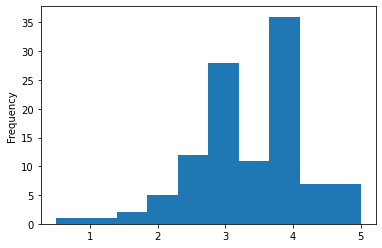

In [0]:
avaliacoes.query('filmeId == 2')["nota"].plot(kind="hist")

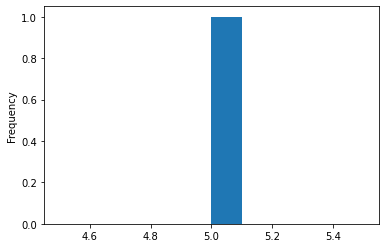

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist")